In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

from sklearn.metrics import f1_score
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Import tools needed for visualization
from sklearn.tree import export_graphviz


# Set random seed for reproducibility
np.random.seed(123)

# Generate random data for each variable
sales = np.random.randint(50, 500, size=400) * 1000
competitor_price = np.random.uniform(1, 5, size=400).round(2)
income = np.random.randint(20, 100, size=400) * 1000
advertising = np.random.randint(1, 10, size=400) * 1000
population = np.random.randint(50, 500, size=400) * 1000
price = np.random.uniform(50, 300, size=400).round(2)
shelf_location = np.random.choice(['Bad', 'Good', 'Medium'], size=400)
age = np.random.randint(18, 80, size=400)
education = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=400)
urban = np.random.choice(['Yes', 'No'], size=400)
us = np.random.choice(['Yes', 'No'], size=400)

# Combine data into a DataFrame
dummy_data = pd.DataFrame({
    'Sales': sales,
    'Competitor Price': competitor_price,
    'Income': income,
    'Advertising': advertising,
    'Population': population,
    'Price': price,
    'Shelf_Location': shelf_location,
    'Age': age,
    'Education': education,
    'Urban': urban,
    'US': us
})

# Write data to CSV file
# dummy_data.to_csv('Company_Data.csv', index=False)
dummy_data.to_csv('Company_Data.csv')
# Display first 5 rows of data
print(dummy_data.head(5))


    Sales  Competitor Price  Income  Advertising  Population   Price   
0  415000              2.20   22000         5000       97000   53.84  \
1  432000              2.64   78000         6000      378000  269.75   
2  372000              2.49   75000         7000      398000  234.41   
3  148000              2.36   41000         5000      450000   82.50   
4  280000              4.25   61000         1000      167000  160.19   

  Shelf_Location  Age    Education Urban   US  
0           Good   21          PhD    No  Yes  
1           Good   37     Bachelor   Yes  Yes  
2            Bad   40       Master   Yes   No  
3         Medium   21  High School   Yes  Yes  
4            Bad   26       Master    No   No  


In [7]:
dummy_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales             400 non-null    int32  
 1   Competitor Price  400 non-null    float64
 2   Income            400 non-null    int32  
 3   Advertising       400 non-null    int32  
 4   Population        400 non-null    int32  
 5   Price             400 non-null    float64
 6   Shelf_Location    400 non-null    object 
 7   Age               400 non-null    int32  
 8   Education         400 non-null    object 
 9   Urban             400 non-null    object 
 10  US                400 non-null    object 
dtypes: float64(2), int32(5), object(4)
memory usage: 26.7+ KB


In [8]:
print('The shape of our dummy data is:', dummy_data.shape)


The shape of our dummy data is: (400, 11)


In [9]:
dummy_data.isnull().any()

Sales               False
Competitor Price    False
Income              False
Advertising         False
Population          False
Price               False
Shelf_Location      False
Age                 False
Education           False
Urban               False
US                  False
dtype: bool

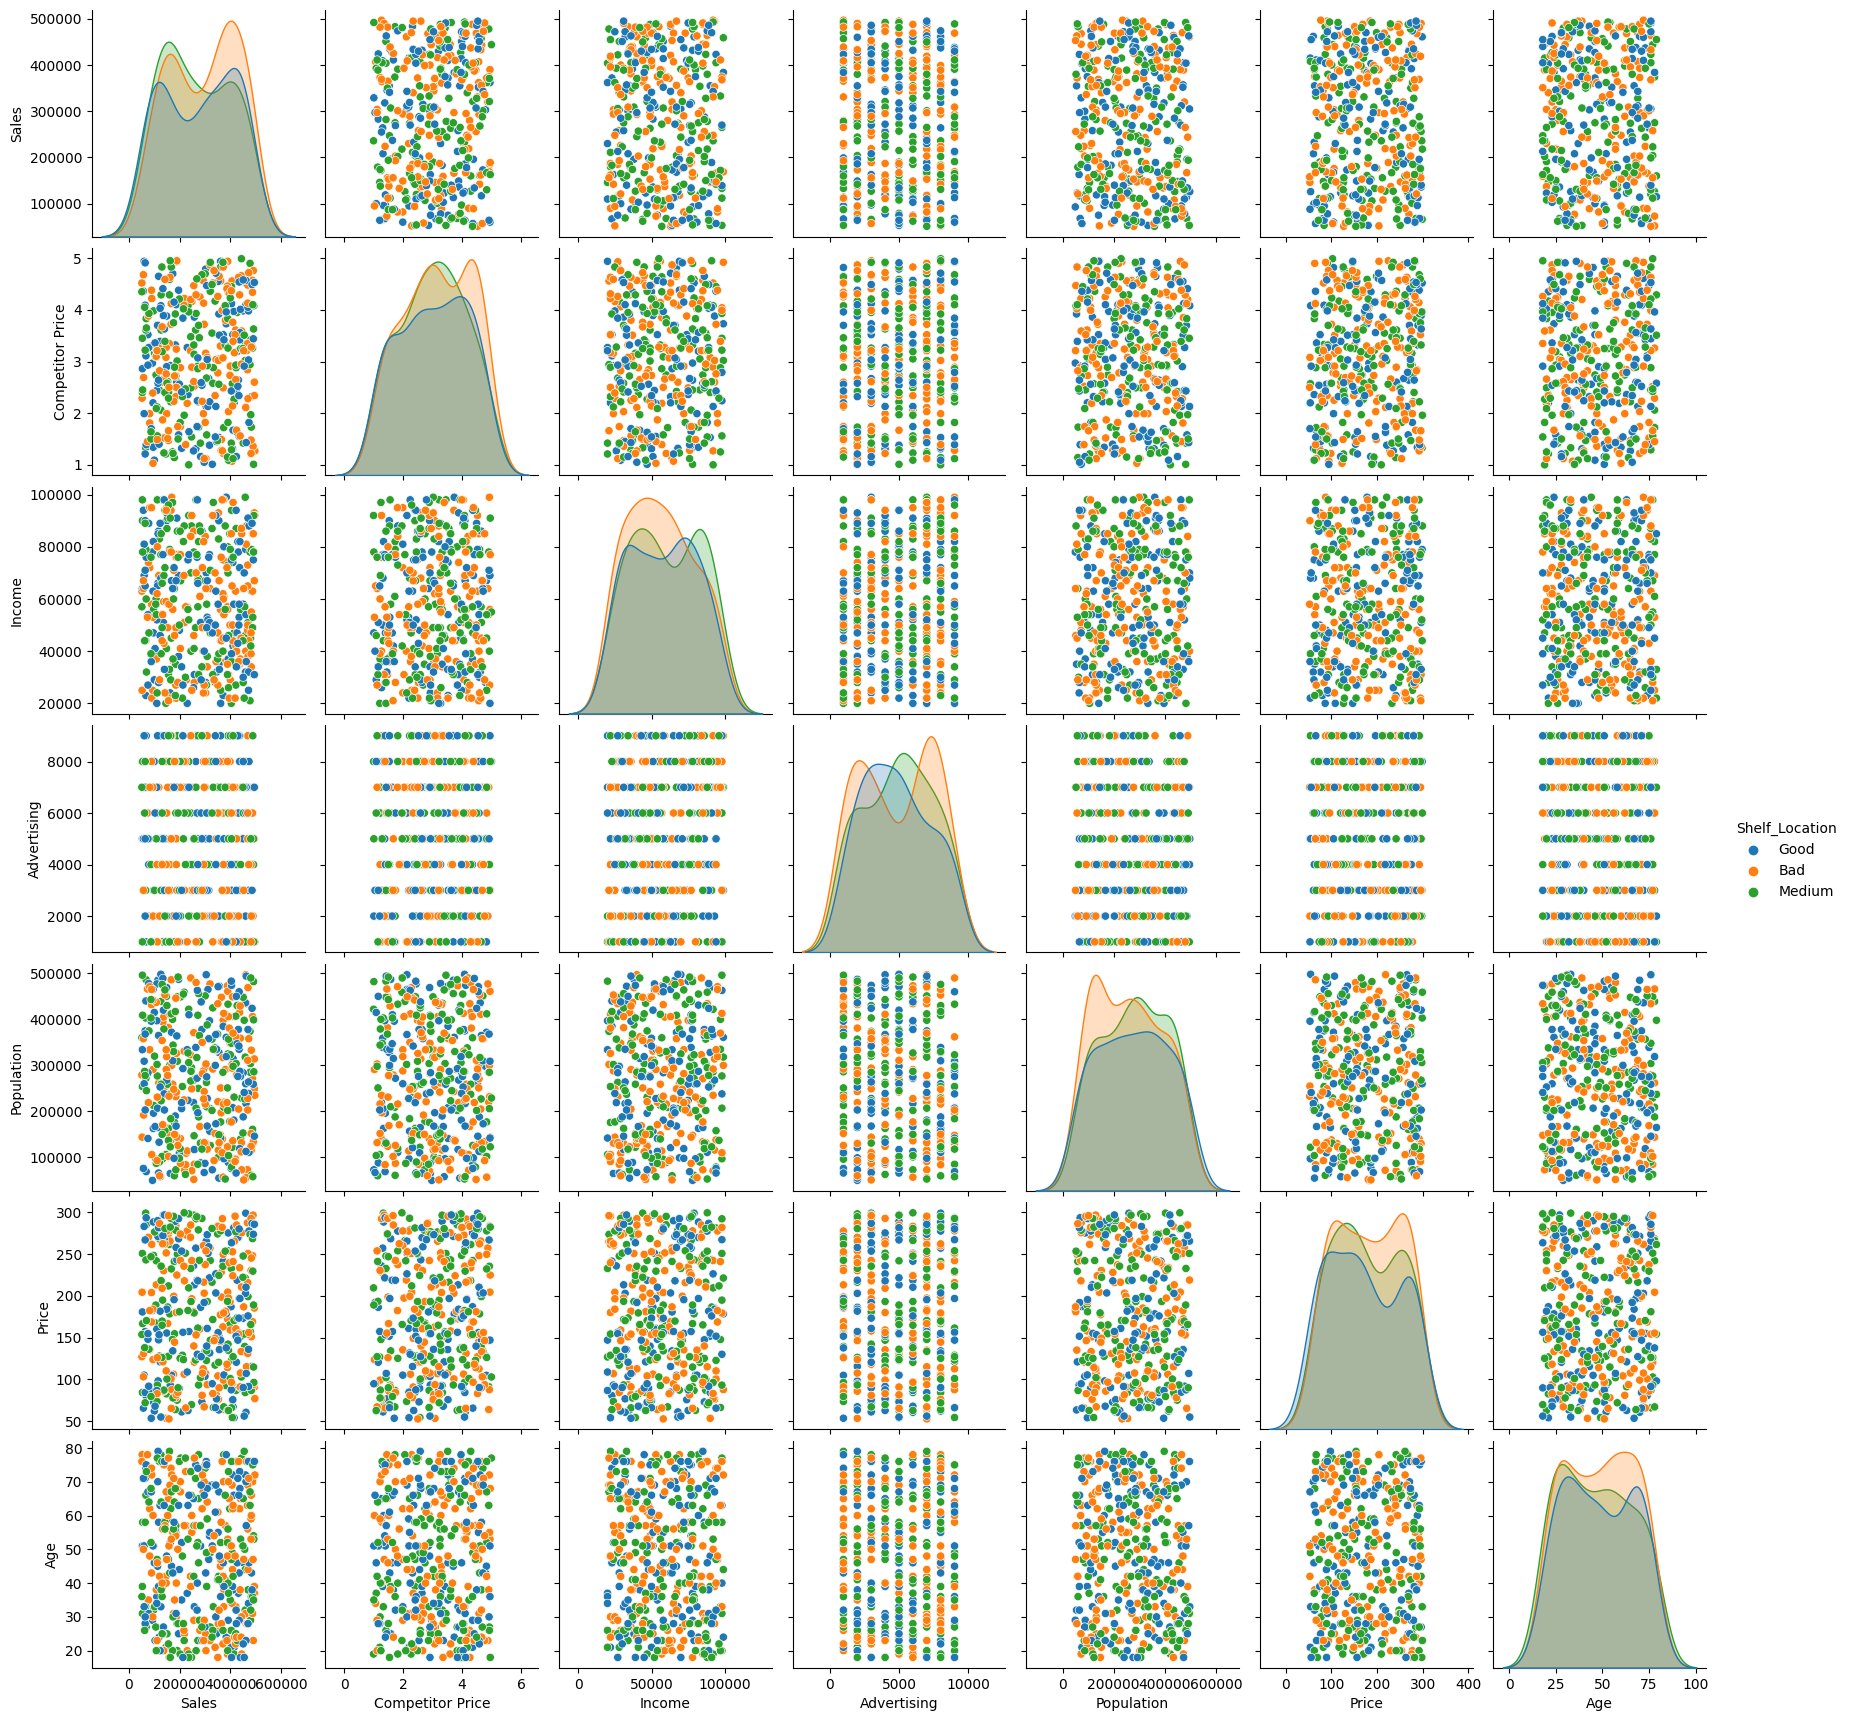

In [10]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=dummy_data, hue = 'Shelf_Location')

In [11]:
#Creating dummy vairiables dropping first dummy variable
df=pd.get_dummies(dummy_data,columns=['Urban','US'], drop_first=True)

In [12]:
print(df.head())

    Sales  Competitor Price  Income  Advertising  Population   Price   
0  415000              2.20   22000         5000       97000   53.84  \
1  432000              2.64   78000         6000      378000  269.75   
2  372000              2.49   75000         7000      398000  234.41   
3  148000              2.36   41000         5000      450000   82.50   
4  280000              4.25   61000         1000      167000  160.19   

  Shelf_Location  Age    Education  Urban_Yes  US_Yes  
0           Good   21          PhD      False    True  
1           Good   37     Bachelor       True    True  
2            Bad   40       Master       True   False  
3         Medium   21  High School       True    True  
4            Bad   26       Master      False   False  


In [13]:
df['Shelf_Location']=df['Shelf_Location'].map({'Good':1, 'Medium':2, 'Bad':3})
df['Education']= df['Education'].map({'High School':1, 'Bachelor':2, 'Master':3, 'PhD':4})

In [14]:
print(df.head())

    Sales  Competitor Price  Income  Advertising  Population   Price   
0  415000              2.20   22000         5000       97000   53.84  \
1  432000              2.64   78000         6000      378000  269.75   
2  372000              2.49   75000         7000      398000  234.41   
3  148000              2.36   41000         5000      450000   82.50   
4  280000              4.25   61000         1000      167000  160.19   

   Shelf_Location  Age  Education  Urban_Yes  US_Yes  
0               1   21          4      False    True  
1               1   37          2       True    True  
2               3   40          3       True   False  
3               2   21          1       True    True  
4               3   26          3      False   False  


,Sales,Competitor Price,Income,Advertising,Population,Price
0,415000,2.20,22000,5000,97000,53.84
1,432000,2.64,78000,6000,378000,269.75
2,372000,2.49,75000,7000,398000,234.41
3,148000,2.36,41000,5000,450000,82.50
4,280000,4.25,61000,1000,167000,160.19
...,...,...,...,...,...,...
395,411000,1.12,76000,9000,298000,127.03
396,131000,3.67,44000,4000,354000,209.08
397,87000,1.64,39000,1000,403000,79.30
398,272000,3.07,66000,4000,197000,217.97


In [16]:
y

0      1
1      1
2      3
3      2
4      3
      ..
395    2
396    3
397    2
398    1
399    3
Name: Shelf_Location, Length: 400, dtype: int64

In [17]:
df['Shelf_Location'].unique()

array([1, 3, 2], dtype=int64)

In [18]:
df.Shelf_Location.value_counts()

Shelf_Location
3    144
2    133
1    123
Name: count, dtype: int64

In [19]:
colnames = list(df.columns)
colnames

['Sales',
 'Competitor Price',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Shelf_Location',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [20]:
df.describe()

,Sales,Competitor Price,Income,Advertising,Population,Price,Shelf_Location,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,278710.000000,3.066650,57950.000000,4870.000000,270795.000000,177.185375,2.052500,47.740000,2.587500
std,136162.481814,1.128991,22826.742001,2531.624539,130541.701439,74.205390,0.816339,18.470661,1.131612
min,51000.000000,1.000000,20000.000000,1000.000000,50000.000000,52.450000,1.000000,18.000000,1.000000
25%,155250.000000,2.220000,38000.000000,3000.000000,149750.000000,111.880000,1.000000,31.000000,2.000000
50%,284000.000000,3.105000,57000.000000,5000.000000,273500.000000,170.985000,2.000000,47.000000,3.000000
75%,404000.000000,4.050000,77250.000000,7000.000000,378250.000000,247.102500,3.000000,65.000000,4.000000
max,497000.000000,4.990000,99000.000000,9000.000000,498000.000000,299.550000,3.000000,79.000000,4.000000


In [21]:
df.head()

,Sales,Competitor Price,Income,Advertising,Population,Price,Shelf_Location,Age,Education,Urban_Yes,US_Yes
0,415000,2.20,22000,5000,97000,53.84,1,21,4,False,True
1,432000,2.64,78000,6000,378000,269.75,1,37,2,True,True
2,372000,2.49,75000,7000,398000,234.41,3,40,3,True,False
3,148000,2.36,41000,5000,450000,82.50,2,21,1,True,True
4,280000,4.25,61000,1000,167000,160.19,3,26,3,False,False


In [22]:
# Labels are the values we want to predict
labels = np.array(df['Income'])

# Remove the labels from the dummy_data
# axis 1 refers to the columns
dummy_data = df.drop('Income', axis = 1)

# Saving dummy_data names for later use
dummy_data_list = list(df.columns)

# Convert to numpy array
dummy_data = np.array(df)

In [23]:
# Split the data into training and testing sets
train_dummy_data, test_dummy_data, train_labels, test_labels = train_test_split(dummy_data, labels, test_size= 0.25, random_state=42)

In [24]:
print('Training Dummy Data Shape:', train_dummy_data.shape)
print('Training labels Shape:', train_labels.shape)
print('Testing Dummy Data Shape:', test_dummy_data.shape)
print('Testing labels Shape:', test_labels.shape)

Training Dummy Data Shape: (300, 11)
Training labels Shape: (300,)
Testing Dummy Data Shape: (100, 11)
Testing labels Shape: (100,)


In [25]:
# The baseline predictions are the historical averages
baseline_preds = test_dummy_data[:, dummy_data_list.index('Sales')]

# Baseline errors, and display average baseline error
baseline_errors= abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  227980.0


In [26]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
# Train the model on training data
rf.fit(train_dummy_data, train_labels); 

In [27]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_dummy_data)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 131.07 degrees.


In [28]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.73 %.


In [30]:
tree = rf.estimators_[5]
feature_names = list(dummy_data_list)

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names=feature_names, rounded=True, precision=1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')


# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth= 3)
rf_small.fit(train_dummy_data, train_labels)

# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names=feature_names, rounded= True, precision= 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png'); 

In [33]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
dummy_data_importances = [(dummy_data, round(importance, 2)) for dummy_data, importance in zip(feature_names, importances)]
# Sort the feature importances by most important first
dummy_data_importances = sorted(dummy_data_importances, key=lambda x: x[1], reverse= True)
# Print out the feature and importances 
[print('Variable: {:20} Importances: {}'.format(*pair)) for pair in dummy_data_importances]


Variable: Income               Importances: 1.0
Variable: Sales                Importances: 0.0
Variable: Competitor Price     Importances: 0.0
Variable: Advertising          Importances: 0.0
Variable: Population           Importances: 0.0
Variable: Price                Importances: 0.0
Variable: Shelf_Location       Importances: 0.0
Variable: Age                  Importances: 0.0
Variable: Education            Importances: 0.0
Variable: Urban_Yes            Importances: 0.0
Variable: US_Yes               Importances: 0.0


[None, None, None, None, None, None, None, None, None, None, None]

In [34]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state= 42)

# Extract the two most important features
important_indices = [dummy_data_list.index('Sales'), dummy_data_list.index('Income')]
train_important = train_dummy_data[:, important_indices]
test_important = test_dummy_data[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape= np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 108.56 degrees.
Accuracy: 99.77 %.


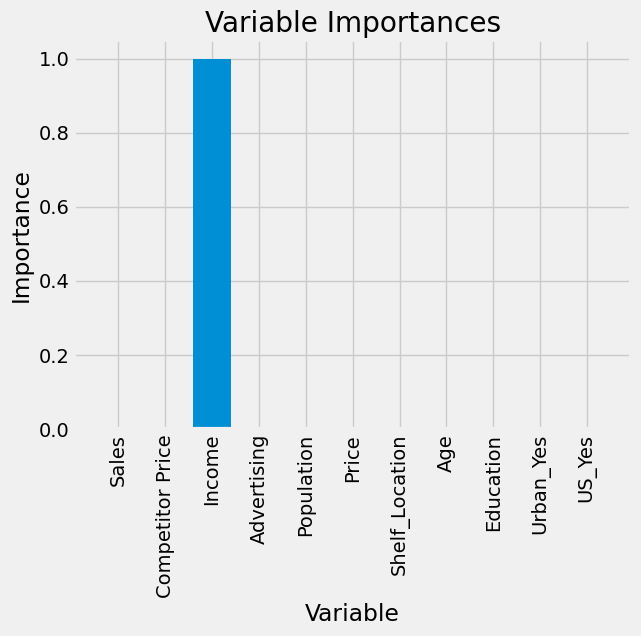

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values= list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
# plt.show()
# Tick labels for x axis
plt.xticks(x_values, dummy_data_list, rotation= 'vertical')
# plt.show()
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances'); 
# plt.show()